In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import *
%matplotlib inline 

 ### Reading Airbnb Data

In [142]:
tokyo = read_csv('abnb_data/east_asia/abnb_tokyo.csv')
beijing = read_csv('abnb_data/east_asia/abnb_bejing.csv')
shanghai = read_csv('abnb_data/east_asia/abnb_shanghai.csv')
seoul = read_csv('abnb_data/east_asia/abnb_seoul.csv')
hong_kong = read_csv('abnb_data/east_asia/abnb_hk.csv')

sydney = read_csv('abnb_data/australia/sydney.csv')
melbourne = read_csv('abnb_data/australia/melbourne.csv')

toronto = read_csv('abnb_data/canada/toronto.csv')
montreal = read_csv('abnb_data/canada/toronto.csv')
vancouver = read_csv('abnb_data/canada/toronto.csv')

new_york = read_csv('abnb_data/usa/New York.csv')
la = read_csv('abnb_data/usa/Los Angeles.csv')
san_fran = read_csv('abnb_data/usa/San Francisco.csv')

rio = read_csv('abnb_data/South_America/Rio.csv')

paris = read_csv('abnb_data/europe/paris.csv')
london = read_csv('abnb_data/europe/london.csv')
rome = read_csv('abnb_data/europe/rome.csv')
barcelona = read_csv('abnb_data/europe/barcelona.csv')
stolkhom = read_csv('abnb_data/europe/stockholm.csv')
moscow = read_csv('abnb_data/europe/moscow.csv')

### Reading Economic Data

In [121]:
econ = read_csv('econ_data/econ_data1.csv')

def econ_data(Country):
    country_e = econ[econ.Country == str(Country)]
    country_e = country_e.reset_index().drop('index', 1)
    country_e = country_e.set_index('Indicator', append = True)
    #country_e = country_e.apply(lambda x: to_numeric(x, errors='ignore'))
    #country_e['2016'] = country_e['2016'].astype(np.int64)
    return country_e

china_e = econ_data('China')
hong_kong_e = econ_data('Hong Kong SAR')
korea_e = econ_data('Korea')
japan_e = econ_data('Japan')


### Getting Statistics for Data

In [125]:
def get_statistics(location):
    location_stats = location[['room_id','overall_satisfaction', 'price', 'reviews', 'accommodates', 'bedrooms', 'bathrooms', 'minstay']].describe()
    location_stats = concat([location_stats.ix[0:4], location_stats.ix[7:]])
    return location_stats

def reorder(location):
    new = location.set_index('location', append = True).unstack(0)
    return new

tokyo = get_statistics(tokyo)
tokyo['location'] = 'Tokyo'
tokyo = reorder(tokyo)

hong_kong = get_statistics(hong_kong)
hong_kong['location'] = 'Hong Kong'
hong_kong = reorder(hong_kong)

beijing = get_statistics(beijing)
beijing['location'] = 'Beijing'
beijing = reorder(beijing)

shanghai = get_statistics(shanghai)
shanghai['location'] = 'Shanghai'
shanghai= reorder(shanghai)

seoul = get_statistics(seoul)
seoul['location'] = 'Seoul'
seoul= reorder(seoul)

In [147]:
sydney = get_statistics(sydney)
sydney['location'] = 'Sydney'
sydney = reorder(sydney)

melbourne = get_statistics(melbourne)
melbourne['location'] = 'Melbourne'
melbourne = reorder(melbourne)

toronto = get_statistics(toronto)
toronto['location'] = 'Toronto'
toronto = reorder(toronto)

montreal = get_statistics(montreal)
montreal['location'] = 'Montreal'
montreal = reorder(montreal)

vancouver = get_statistics(vancouver)
vancouver['location'] = 'Vancouver'
vancouver = reorder(vancouver)

la = get_statistics(la)
la['location'] = 'LA'
la = reorder(la)

rio = get_statistics(rio)
rio['location'] = 'Rio'
rio = reorder(rio)

london = get_statistics(london)
london['location'] = 'London'
london = reorder(london)

barcelona = get_statistics(barcelona)
barcelona['location'] = 'Barcelona'
barcelona = reorder(barcelona)

paris = get_statistics(paris)
paris['location'] = 'Paris'
paris = reorder(paris)

### Grouping Statistical Data by Geography, Economy Type etc...

East Asian Countries

In [50]:
east_asia = concat([beijing, tokyo, seoul, hong_kong])
east_asia

room_id                                                   \
            count         max          mean      min           std   
location                                                             
Beijing    2158.0   8112096.0  5.706924e+06  44054.0  2.152427e+06   
Tokyo      6371.0   8062042.0  5.458334e+06   7565.0  1.952667e+06   
Seoul      8519.0  13243603.0  7.514626e+06  35108.0  3.677643e+06   
Hong Kong  4245.0   9883424.0  5.754796e+06   8402.0  2.778873e+06   

          overall_satisfaction                                  ...     \
                         count  max      mean  min       std    ...      
location                                                        ...      
Beijing                 1043.0  5.0  4.613615  1.0  0.595719    ...      
Tokyo                   5099.0  5.0  4.551971  1.0  0.504341    ...      
Seoul                   3940.0  5.0  4.682741  1.5  0.377364    ...      
Hong Kong               2943.0  5.0  4.418281  1.0  0.590716    ...      

          bathrooms                               minstay                   \
              count  max      mean  min       std   count    max      mean   
location                                                                     
Beijing      2130.0  8.0  1.154930  0.0  0.589510  2121.0   25.0  1.820839   
Tokyo        6343.0  8.0  1.113432  0.0  0.500809  5885.0  100.0  2.137808   
Seoul        8008.0  8.0  1.183691  0.0  0.749405  8295.0   25.0  1.697649   
Hong Kong    4080.0  8.0  1.194363  0.0  0.747451  4188.0   27.0  2.011223   

                          
           min       std  
location                  
Beijing    1.0  2.442540  
Tokyo      1.0  2.800870  
Seoul      1.0  1.741066  
Hong Kong  1.0  2.097485  

[4 rows x 40 columns]

Europe

In [145]:
europe = concat([london, barcelona, paris])
europe

room_id                                                   \
             count         max          mean      min           std   
location                                                              
London       563.0  10386865.0  5.844303e+06  49739.0  3.012136e+06   
Barcelona  14012.0   9298534.0  4.458554e+06   7670.0  2.795740e+06   
Paris      41761.0  10262574.0  4.867253e+06   2525.0  3.035482e+06   

          overall_satisfaction                                  ...      \
                         count  max      mean  min       std    ...       
location                                                        ...       
London                   407.0  5.0  4.583538  2.0  0.534890    ...       
Barcelona              11311.0  5.0  4.477942  1.0  0.484667    ...       
Paris                  30117.0  5.0  4.576485  1.0  0.457304    ...       

          bathrooms                                minstay                    \
              count  max      mean  min       std    count     max      mean   
location                                                                       
London        498.0  3.0  1.142570  0.0  0.361301    551.0    20.0  2.475499   
Barcelona   12875.0  8.0  1.270680  0.0  0.620308  12961.0  1124.0  2.778104   
Paris       39064.0  8.0  1.082838  0.0  0.355109  40917.0   365.0  3.177383   

                           
           min        std  
location                   
London     1.0   2.268928  
Barcelona  1.0  10.965926  
Paris      1.0   8.085721  

[3 rows x 40 columns]

USA

Canada

In [153]:
canada = concat([vancouver])
canada

room_id                                                  \
            count         max          mean     min           std   
location                                                            
Vancouver  8453.0  11874214.0  6.330753e+06  1419.0  3.269708e+06   

          overall_satisfaction                                 ...      \
                         count  max     mean  min       std    ...       
location                                                       ...       
Vancouver               5875.0  5.0  4.69983  1.0  0.449037    ...       

          bathrooms                               minstay                   \
              count  max      mean  min       std   count    max      mean   
location                                                                     
Vancouver    7660.0  7.0  1.184465  0.0  0.485641  8258.0  365.0  4.177767   

                           
           min        std  
location                   
Vancouver  1.0  16.526457  

[1 rows x 40 columns]

Australia

In [152]:
australia = concat([melbourne])
australia

room_id                                             ... minstay  \
            count                                             ...     std   
            count                      max                    ...     min   
            count  max mean  min std count  max mean  min std ...   count   
location                                                      ...           
Melbourne     1.0  1.0  1.0  1.0 NaN   1.0  5.0  5.0  5.0 NaN ...     1.0   

                                                                             
                                                                             
                                                       std                   
                   max         mean          min std count max mean min std  
location                                                                     
Melbourne  3106.467315  3106.467315  3106.467315 NaN   0.0 NaN  NaN NaN NaN  

[1 rows x 1000 columns]

South Asia

In [ ]:
# singapore, srilanka

South America

In [ ]:
# brazil

Emerging Countries

In [ ]:
# china, srilanka, brazil

Advanced Countries

In [ ]:
# australia, france, germany, HK, greece, spain, sweden, UK, us, japan, korea, iceland, singapore, canada, italy

### Creating DataFrames that contain Economic Indicators for each grouping of countries.

GDP for East Asian Countries

In [130]:
GDP_east_asia = DataFrame({
    'China' : china_e.ix[0,'2016'], 
    'Japan' : japan_e.ix[0,'2016'], 
    'Korea': korea_e.ix[0,'2016'],
    'Hong Kong': hong_kong_e.ix[0,'2016']
    }).stack(0).unstack(0)

### Creating Value Index for Each Group

***The value index is a measure of the average rating over the average price. The higher the index, the better the listing is on average for the price.***

East Asia

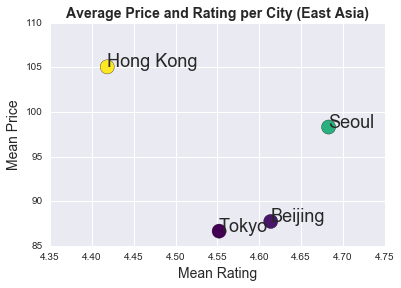

In [131]:
x = east_asia['overall_satisfaction']['mean']
y = east_asia['price']['mean']
n = (x.reset_index()).location.tolist()

fig, ax = plt.subplots()
ax.scatter(x, y, c=y, cmap='viridis', s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 18)

plt.xlabel('Mean Rating', fontsize=14)
plt.ylabel('Mean Price', fontsize=14)
plt.title('Average Price and Rating per City (East Asia)', fontsize=14, fontweight='bold')

In [127]:
east_asia_VI = DataFrame(east_asia['overall_satisfaction']['mean'] / east_asia['price']['mean'])
east_asia_VI = value_index.rename(columns = {'mean':'value_index'})
east_asia_VI

,value_index
location,
Beijing,0.052589
Tokyo,0.052536
Seoul,0.047636
Hong Kong,0.042063


### Plotting Value Index and Economic Indicators

East Asia

In [108]:
x = value_index['value_index']
y = GDP_east_asia['GDP']

#n = (x.reset_index()).location.tolist()

fig, ax = plt.subplots()
ax.scatter(x, y)#, c=y, cmap='viridis', s =200)

#for i, txt in enumerate(n):
    #ax.annotate(txt, (x[i],y[i]), fontsize = 18)

plt.xlabel('Value Index', fontsize=14)
plt.ylabel('GDP', fontsize=14)
plt.title('Value Index and GDP', fontsize=14, fontweight='bold')

ValueError: invalid literal for float(): 1,321.20

Error in callback <function post_execute at 0x10a2929b0> (for post_execute):


ValueError: invalid literal for float(): 1,321.20

ValueError: invalid literal for float(): 1,321.20

### Creating Popularity Index for Each Group

***The popularity index is a measure of the popularity of a listing (# of reviews) over the average price. The higher the index, more popular the listing is on average for the price.***

East Asia

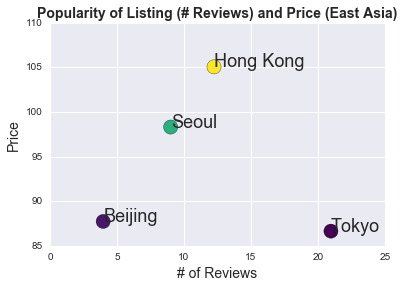

In [133]:
x = east_asia['reviews']['mean']
y = east_asia['price']['mean']

n = (x.reset_index()).location.tolist()

fig, ax = plt.subplots()
ax.scatter(x, y, c=y, cmap='viridis', s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 18)

plt.xlabel('# of Reviews', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Popularity of Listing (# Reviews) and Price (East Asia)', fontsize=14, fontweight='bold')

In [136]:
east_asia_PI = DataFrame(east_asia['reviews']['mean'] / east_asia['price']['mean'])
east_asia_PI = east_asia_PI.rename(columns = {'mean':'pop_index'})
east_asia_PI

,pop_index
location,
Beijing,0.045188
Tokyo,0.242055
Seoul,0.091574
Hong Kong,0.116536


### Plotting Value Index and Economic Indicators

East Asia